In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

new_df = pd.read_csv('/Users/raghavnyati/Desktop/dataset/restaurants_data', sep='\t')


In [2]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 8 columns):
Unnamed: 0       49403 non-null int64
business_id      49403 non-null object
review_count     49403 non-null float64
stars            49403 non-null float64
checkin_count    49403 non-null float64
city             49403 non-null int64
state            49403 non-null int64
categories       49403 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 3.0+ MB


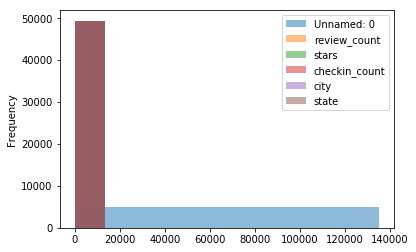

In [3]:
plt.figure();

new_df.plot.hist(alpha=0.5)

plt.show()

In [4]:
new_df["stars"].value_counts()

4.0    30560
3.0     9055
2.0     8331
5.0     1186
1.0      271
Name: stars, dtype: int64

In [5]:
new_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 4 columns):
review_count     49403 non-null float64
checkin_count    49403 non-null float64
city             49403 non-null int64
state            49403 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 1 columns):
stars    49403 non-null float64
dtypes: float64(1)
memory usage: 386.0 KB


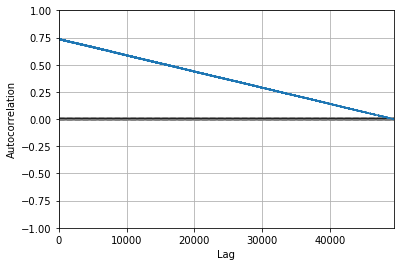

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(X)
plt.show()

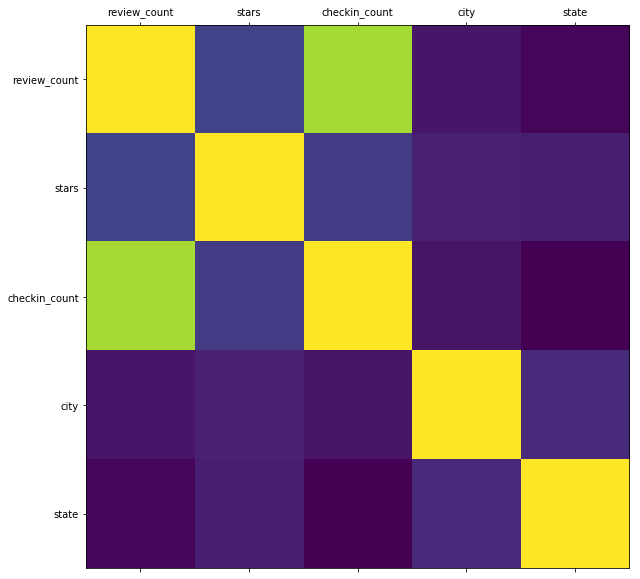

In [10]:
corr = new_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

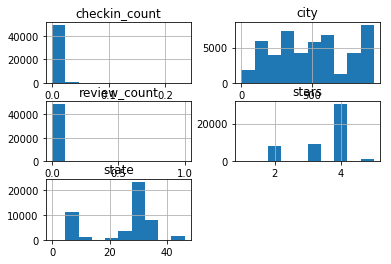

In [11]:
new_df.hist()
plt.show()

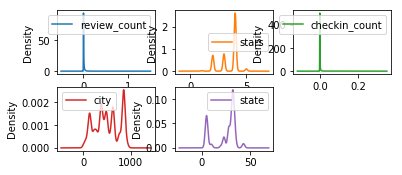

In [12]:
new_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

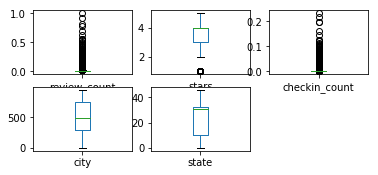

In [13]:
new_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

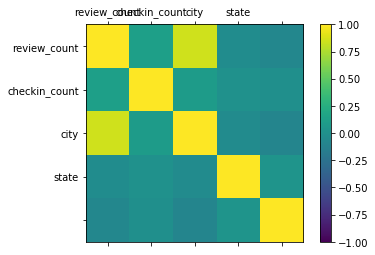

In [14]:
correlations = new_df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(X)
ax.set_yticklabels(X)
plt.show()

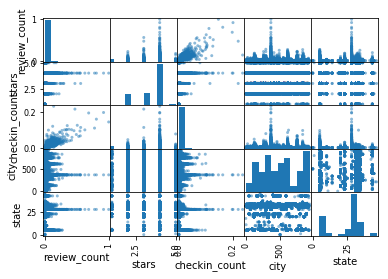

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_df)
plt.show()

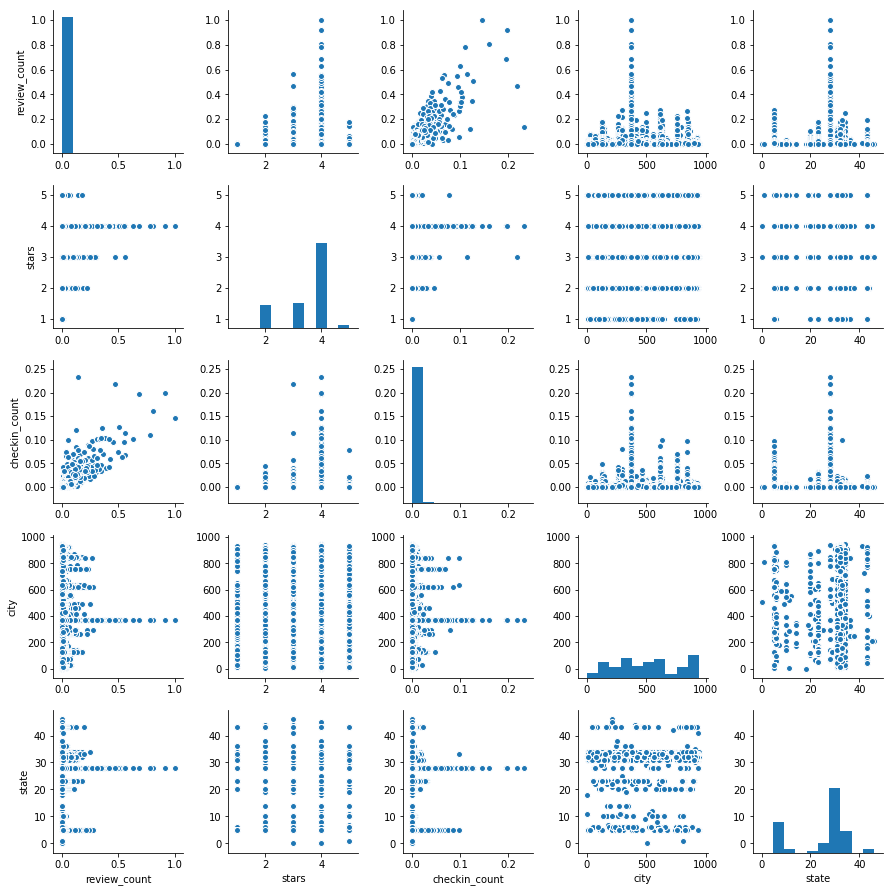

In [17]:
sns.pairplot(new_df)
plt.show()

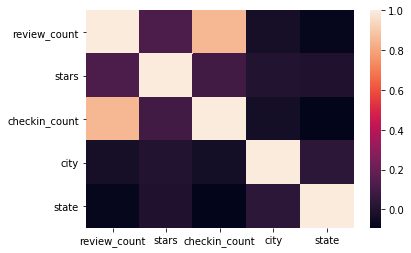

In [18]:
import seaborn as sns
corr = new_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [19]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression

import time

t0 = time.clock()

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

regression_model.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

import math
math.sqrt(regression_model_mse)

run_time = time.clock() - t0
print('Linear Regression run in %.3f s' % run_time)

The intercept for our model is 3.48965898327
Linear Regression run in 0.011 s


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Decision Tree

In [158]:
import time
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('Default Decision Tree run in %.3f s' % run_time)

0.478989555502
0.480342304765
0.478989555502
Default Decision Tree run in 0.145 s


In [160]:
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

print(cm)

run_time = time.clock() - t0
print('DT with depth 5 run in %.3f s' % run_time)

0.614363209457
0.451613523266
0.614363209457
[[   0    6    0   66    0]
 [   0  107    0 1993    0]
 [   0   47    0 2252    0]
 [   0   88    3 7481    0]
 [   0    3    0  305    0]]
DT with depth 5 run in 0.075 s


In [161]:
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=5, presort='true')

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('DT with depth 5 and presort true run in %.3f s' % run_time)

0.614363209457
0.451613523266
0.614363209457
DT with depth 5 and presort true run in 0.056 s


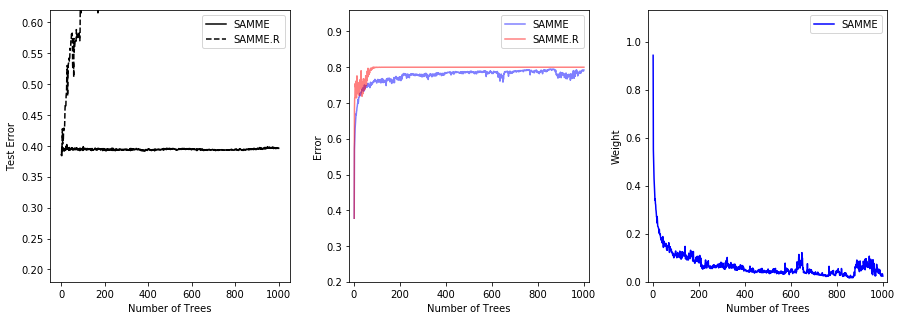

AdaBoostClassifier with DT run in 103.221 s


In [162]:
t0 = time.clock()

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=1000,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=1000,
    learning_rate=0.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

run_time = time.clock() - t0
print('AdaBoostClassifier with DT run in %.3f s' % run_time)

In [163]:
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=10, presort='true')

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('DT with depth 10 and presort true run in %.3f s' % run_time)

0.60480932718
0.490409543267
0.60480932718
DT with depth 10 and presort true run in 0.205 s


In [164]:
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=15, presort='true')

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('DT with depth 15 and presort true run in %.3f s' % run_time)

0.562545542871
0.478486322205
0.562545542871
DT with depth 15 and presort true run in 0.876 s


SVM

In [165]:
import time

t0 = time.clock()

from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)

print (type(accuracy_score(y_test, y_predict)))
svm1 =accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVM run in %.3f s' % run_time)

<type 'numpy.float64'>
0.613148732896
0.562021295461
0.613148732896
SVM run in 95.215 s


In [166]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, y)

y_predict = clf.predict(X_test)
svm2 = precision_score(y_test, y_predict,average='weighted')

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

print clf.support_vectors_

run_time = time.clock() - t0
print('SVM with ovo run in %.3f s' % run_time)

0.613148732896
0.562021295461
0.613148732896
[[-0.36721421 -0.26532219 -1.45891492 -0.12712737]
 [-0.37401513 -0.29033975 -0.16773078  0.56471666]
 [-0.37401513 -0.28700408 -0.08531477  0.65119716]
 ..., 
 [-0.36721421 -0.26699003  0.52299386  0.73767767]
 [-0.38081605 -0.29367543 -0.50131939  0.30527515]
 [-0.3604133  -0.28867192 -0.07746563  1.60248271]]
SVM with ovo run in 93.149 s


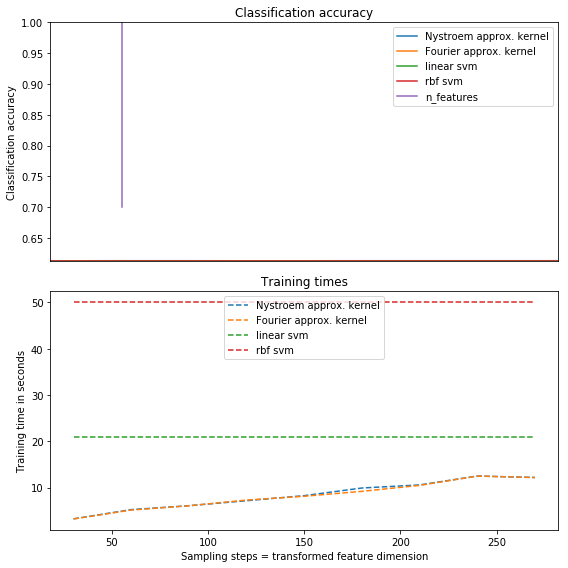

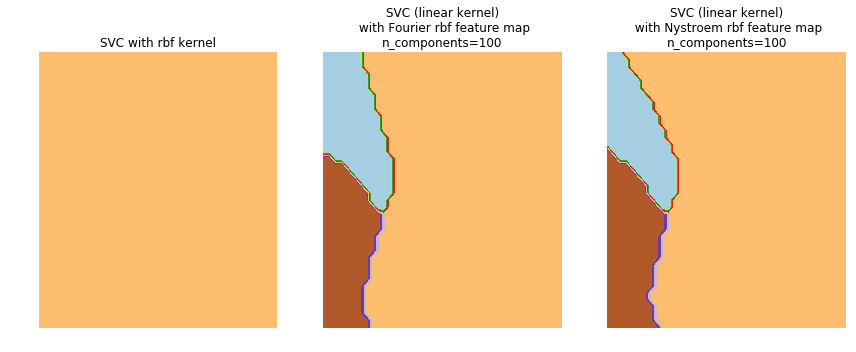

In [168]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA

n_samples = 35000
data = X / 8.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (X_train, y_train)


# Now predict the value of the digit on the second half:
data_test, targets_test = (X_test, y_test)

# Create a classifier: a support vector classifier
kernel_svm = svm.SVC(gamma=.2)
linear_svm = svm.LinearSVC()

# create pipeline from kernel approximation
# and linear svm
feature_map_fourier = RBFSampler(gamma=.2, random_state=1)
feature_map_nystroem = Nystroem(gamma=.2, random_state=1)
fourier_approx_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("svm", svm.LinearSVC())])

nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svm.LinearSVC())])

# fit and predict using linear and kernel svm:

kernel_svm_time = time()
kernel_svm.fit(data_train, targets_train)
kernel_svm_score = kernel_svm.score(data_test, targets_test)
kernel_svm_time = time() - kernel_svm_time

linear_svm_time = time()
linear_svm.fit(data_train, targets_train)
linear_svm_score = linear_svm.score(data_test, targets_test)
linear_svm_time = time() - linear_svm_time

sample_sizes = 30 * np.arange(1, 10)
fourier_scores = []
nystroem_scores = []
fourier_times = []
nystroem_times = []

for D in sample_sizes:
    fourier_approx_svm.set_params(feature_map__n_components=D)
    nystroem_approx_svm.set_params(feature_map__n_components=D)
    start = time()
    nystroem_approx_svm.fit(data_train, targets_train)
    nystroem_times.append(time() - start)

    start = time()
    fourier_approx_svm.fit(data_train, targets_train)
    fourier_times.append(time() - start)

    fourier_score = fourier_approx_svm.score(data_test, targets_test)
    nystroem_score = nystroem_approx_svm.score(data_test, targets_test)
    nystroem_scores.append(nystroem_score)
    fourier_scores.append(fourier_score)

# plot the results:
plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)
# second y axis for timeings
timescale = plt.subplot(212)

accuracy.plot(sample_sizes, nystroem_scores, label="Nystroem approx. kernel")
timescale.plot(sample_sizes, nystroem_times, '--',
               label='Nystroem approx. kernel')

accuracy.plot(sample_sizes, fourier_scores, label="Fourier approx. kernel")
timescale.plot(sample_sizes, fourier_times, '--',
               label='Fourier approx. kernel')

# horizontal lines for exact rbf and linear kernels:
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [linear_svm_score, linear_svm_score], label="linear svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')

accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label="rbf svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='rbf svm')

# vertical line for dataset dimensionality = 64
accuracy.plot([64, 64], [0.7, 1], label="n_features")

# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
accuracy.set_xticks(())
accuracy.set_ylim(np.min(fourier_scores), 1)
timescale.set_xlabel("Sampling steps = transformed feature dimension")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')

# visualize the decision surface, projected down to the first
# two principal components of the dataset
pca = PCA(n_components=4).fit(data_train)

X = pca.transform(data_train)

# Generate grid along first two principal components
multiples = np.arange(-2, 2, 0.1)
# steps along first component
first = multiples[:, np.newaxis] * pca.components_[0, :]
# steps along second component
second = multiples[:, np.newaxis] * pca.components_[1, :]
# combine
grid = first[np.newaxis, :, :] + second[:, np.newaxis, :]
flat_grid = grid.reshape(-1, data.shape[1])

# title for the plots
titles = ['SVC with rbf kernel',
          'SVC (linear kernel)\n with Fourier rbf feature map\n'
          'n_components=100',
          'SVC (linear kernel)\n with Nystroem rbf feature map\n'
          'n_components=100']

plt.tight_layout()
plt.figure(figsize=(12, 5))

# predict and plot
for i, clf in enumerate((kernel_svm, nystroem_approx_svm,
                         fourier_approx_svm)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 3, i + 1)
    Z = clf.predict(flat_grid)

    # Put the result into a color plot
    Z = Z.reshape(grid.shape[:-1])
    plt.contourf(multiples, multiples, Z, cmap=plt.cm.Paired)
    plt.axis('off')

plt.title(titles[i])
plt.tight_layout()
plt.show()

In [169]:
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [30]:
import time
from sklearn import svm
t0 = time.clock()

lin_clf = svm.LinearSVC()
lin_clf.fit(X, y)

y_predict = lin_clf.predict(X_test)

# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('Linear SVC run in %.3f s' % run_time)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_clf, X_train, y_train, cv=10)
scores 

0.612986802688
0.375832880158
0.612986802688
Linear SVC run in 26.597 s


array([ 0.62017804,  0.62007555,  0.62034539,  0.62007555,  0.62034539,
        0.62007555,  0.62051282,  0.62024291,  0.62057791,  0.62074554])

In [171]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)

# accuracy_score(y_test, y_predict)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with kernel rbf run in %.3f s' % run_time)

0.613148732896
0.562021295461
0.613148732896
SVC with kernel rbf run in 93.070 s


In [172]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(kernel="linear", C=0.025)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with linear kernel run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
SVC with linear kernel run in 49.151 s


In [173]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=2, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 2 and C=1 in %.3f s' % run_time)

0.613391628208
0.587049877186
0.613391628208
SVC with gamma 2 and C=1 in 169.706 s


In [174]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=2, C=0.5)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 2 and C=0.5 in %.3f s' % run_time)


0.613067767792
0.375852087906
0.613067767792
SVC with gamma 2 and C=0.5 in 132.935 s


In [175]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=2, C=0.25)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 2 and C=0.25 in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
SVC with gamma 2 and C=0.25 in 110.657 s


In [176]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=.2, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma=0.2 and C=1 in %.3f s' % run_time)

0.613148732896
0.562021295461
0.613148732896
SVC with gamma=0.2 and C=1 in 89.533 s


In [177]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=10, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 10 and C=1 in %.3f s' % run_time)

0.615334790705
0.676351965593
0.615334790705
SVC with gamma 10 and C=1 in 319.627 s


In [178]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=50, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 50 and C=1 in %.3f s' % run_time)

0.623512266213
0.648575742256
0.623512266213
SVC with gamma 50 and C=1 in 355.992 s


In [179]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=100, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 100 and C=1 in %.3f s' % run_time)

0.631203951097
0.656593258817
0.631203951097
SVC with gamma 100 and C=1 in 408.551 s


In [180]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=500, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 500 and C=1 in %.3f s' % run_time)

0.656060238037
0.684710350188
0.656060238037
SVC with gamma 500 and C=1 in 383.326 s


In [181]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=1000, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 1000 and C=1 in %.3f s' % run_time)

0.673872560926
0.709617349438
0.673872560926
SVC with gamma 1000 and C=1 in 361.896 s


In [198]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=1500, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 1500 and C=1 in %.3f s' % run_time)

0.687150837989
0.726656116299
0.687150837989
SVC with gamma 1500 and C=1 in 388.399 s


In [200]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=2000, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 2000 and C=1 in %.3f s' % run_time)

0.695733139017
0.735632981114
0.695733139017
SVC with gamma 2000 and C=1 in 398.408 s


In [203]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=2500, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 2500 and C=1 in %.3f s' % run_time)

0.703667719213
0.750847027995
0.703667719213
SVC with gamma 2000 and C=1 in 374.408 s


In [205]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=5000, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 5000 and C=1 in %.3f s' % run_time)

0.728604971257
0.773015361997
0.728604971257
SVC with gamma 5000 and C=1 in 368.605 s


In [207]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=10000, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 10000 and C=1 in %.3f s' % run_time)

0.753785118614
0.790794188209
0.753785118614
SVC with gamma 10000 and C=1 in 323.129 s


In [209]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=20000, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 20000 and C=1 in %.3f s' % run_time)

0.786495020646
0.814371894328
0.786495020646
SVC with gamma 10000 and C=1 in 338.190 s


In [211]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=40000, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 40000 and C=1 in %.3f s' % run_time)

0.816856934661
0.837690189835
0.816856934661
SVC with gamma 40000 and C=1 in 346.780 s


In [ ]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=40000, C=1000)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 40000 and C=1000 in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=40000, C=100)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 40000 and C=100 in %.3f s' % run_time)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_clf, X_train, y_train, cv=10)
scores 

In [ ]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=40000, C=10)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 40000 and C=10 in %.3f s' % run_time)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

print(cm)
print precision_score(y_test, y_predict, average=None)
print recall_score(y_test, y_predict, average=None)

In [ ]:
t0 = time.clock()

from sklearn import svm

clf = svm.SVC(gamma=0.10000000000000001, C=1)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('SVC with gamma 0.10000000000000001 and C=1 in %.3f s' % run_time)

RANDOM FOREST CLASSIFIER

In [182]:
import time
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average=None)
print recall_score(y_test, y_predict, average=None)

run_time = time.clock() - t0
print('RFC max-depth=10 and n-estimator=30 run in %.3f s' % run_time)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.614929965185
[ 0.          0.425       0.13333333  0.62119823  0.        ]
[ 0.          0.0647619   0.00173989  0.98454834  0.        ]
RFC max-depth=10 and n-estimator=30 run in 1.093 s


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.616711197474
[ 0.          0.52604167  0.          0.61814294  0.        ]
[ 0.          0.04809524  0.          0.99260433  0.        ]
0.468404650395
0.616711197474
RFC max-depth=8 and n-estimator=50 run in 17.356 s
Feature ranking:
1. feature 0 (0.456283)
2. feature 1 (0.248002)
3. feature 3 (0.185962)
4. feature 2 (0.109753)


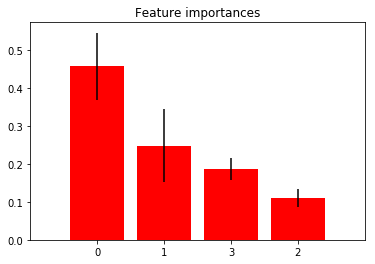

In [183]:
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=1, oob_score='true')
random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)

print precision_score(y_test, y_predict, average=None)
print recall_score(y_test, y_predict, average=None)

print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('RFC max-depth=8 and n-estimator=50 run in %.3f s' % run_time)

# print random_forest.feature_importances_

importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [184]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

print cm

[[   0    2    0   70    0]
 [   0  101    0 1999    0]
 [   0   31    0 2268    0]
 [   0   56    0 7516    0]
 [   0    2    0  306    0]]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


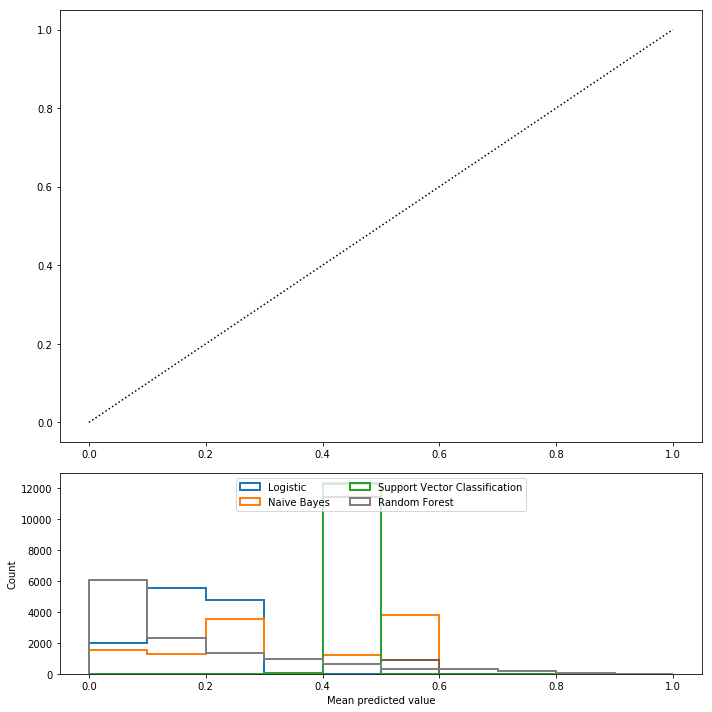

In [185]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=1000)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
#     fraction_of_positives, mean_predicted_value = \
#         calibration_curve(y_predict, prob_pos, n_bins=10)

#     ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
#              label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

# ax1.set_ylabel("Fraction of positives")
# ax1.set_ylim([-0.05, 1.05])
# ax1.legend(loc="lower right")
# ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

Increasing n_estimators increases the accuracy little. 
Increasing max_dept decreases the accuracy while decreasing it below this number also decreases the accuracy. 

In [186]:
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=1, )
random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
# print accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

print(random_forest.feature_importances_)

run_time = time.clock() - t0
print('RFC max-depth=8 and n-estimator=100 run in %.3f s' % run_time)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.616549267266
0.468410966296
0.616549267266
[ 0.45955197  0.24514563  0.11006384  0.18523856]
RFC max-depth=8 and n-estimator=100 run in 30.262 s


Logistic Regression

In [187]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV()
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 2.912 s


In [188]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(max_iter=100)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 3.146 s


In [189]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 3.156 s


In [190]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(tol=1e-1, max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 2.857 s


In [191]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(tol=1e-5, max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 3.541 s


In [192]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=1e-1, max_iter=1000, C=1)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 0.304 s


In [193]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=1e-1, max_iter=1000, C=0.5)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 0.264 s


In [194]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=1e-1, max_iter=1000, C=0.25)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 0.207 s


In [195]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=1e-1, max_iter=1000, C=1, solver='newton-cg')
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 0.537 s


In [196]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=1e-1, max_iter=5000, C=1, penalty='l2')
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

0.613067767792
0.375852087906
0.613067767792
LR with tol=1e-2 run in 0.208 s


In [ ]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(multi_class='multinomial', tol=1e-2, solver='newton-cg', max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(multi_class='multinomial', tol=1e-5, solver='newton-cg', max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('LR with tol=1e-5 run in %.3f s' % run_time)

In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

t0 = time.clock()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000

X = X[:n_samples]
y = y[:n_samples]


train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 3]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                C=1,
                                penalty='l1',
                                fit_intercept=True,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = time.clock()
        lr.fit(X_train, y_train)
        train_time = time.clock() - t1

        y_pred = lr.predict(X_test)
#         y_predict = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)    # np.sum(y_pred == y_test) / y_test.shape[1]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % '20newsgroups')
fig.tight_layout()
fig.subplots_adjust(top=0.85)

run_time = time.clock() - t0
print('Example run in %.3f s' % run_time)
plt.show()

KNEIGHBHORS CLASSIFIER

In [ ]:
import time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=3 run in %.3f s' % run_time)

In [ ]:
import time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=3 run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=50 run in %.3f s' % run_time)

In [ ]:
import time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=3 run in %.3f s' % run_time)

In [ ]:
import time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=500)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=3 run in %.3f s' % run_time)

In [ ]:
import time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=3 run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100, algorithm='brute')
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=50 and brute algo run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100, algorithm='ball_tree', weights='uniform', p=5)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('KNeighb with n=50 and algo=ball_tree run in %.3f s' % run_time)

GaussianProcessClassifier

BERNOULLI NB

In [ ]:
t0 = time.clock()

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = nb.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('BernoulliNB run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = nb.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('BernoulliNB run in %.3f s' % run_time)

MLP CLASSIFIER

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100, ), activation='logistic', alpha=0.001, learning_rate='adaptive')
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (100,) run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100, ), activation='logistic', alpha=0.001, learning_rate='adaptive')
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (100,) run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (5,2) and alpha=1e-5 run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8), random_state=1)
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (10,8) with alpha=1e-5 run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10, 5), random_state=1)
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (15,10,5) run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(15, ), random_state=1, max_iter=100)
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (15,) run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100, ), activation='tanh', alpha=0.001, learning_rate='adaptive')
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (100,) run in %.3f s' % run_time)

In [ ]:
t0 = time.clock()

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(200, 100, ), activation='tanh', alpha=0.001, learning_rate='adaptive', solver='lbfgs')
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print accuracy_score(y_test, y_predict)
print precision_score(y_test, y_predict, average='weighted')
print recall_score(y_test, y_predict, average='weighted')

run_time = time.clock() - t0
print('MLPClassifier with (100,) run in %.3f s' % run_time)

In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


RANDOM_STATE = 123

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()